# Joint Distributions
Author(s) Paul Miles | July 17, 2019

This tutorial provides a demonstration of the joint distributions plotting routine available in `mcmcplot`.

In [1]:
# import required packages
import numpy as np
from mcmcplot import mcmcplot as mcp
import mcmcplot
print(mcmcplot.__version__)

1.0.0


# Generate Random Chains
The plotting routines are designed to be used in conjunction with the result of a MCMC simulation.  For the purpose of this example, we consider a randomly generated chain.  We will consider a chain with 3 parameters that have the following distributions:
- $p_{0} \sim N(1.0, 0.5)$
- $p_{1} \sim N(2.5, 3.0)$
- $p_{2} \sim N(-1.3, 0.75)$

In [2]:
nsimu = 1000
npar = 3
mu = np.array([1.0, 2.5, -1.3])
sig = np.array([0.5, 3.0, 0.75])
chain = np.zeros([nsimu, npar])
for ii in range(npar):
    chain[:,ii] = sig[ii]*np.random.randn(nsimu,) + mu[ii]

# Plot Default Joint Distributions
This routine will generate a joint distribution plot for each parameter combination in the chain.  For this example, `npar = 3`, so 3 different plots will be generated representing the combinations:
- $p_0$, $p_1$
- $p_0$, $p_2$
- $p_1$, $p_2$

Note, that each function call returns the figure handles as well as the settings used to generate the plots if the keyword argument `return_settings=True`.

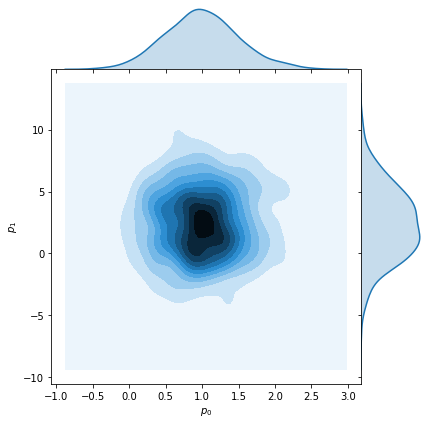

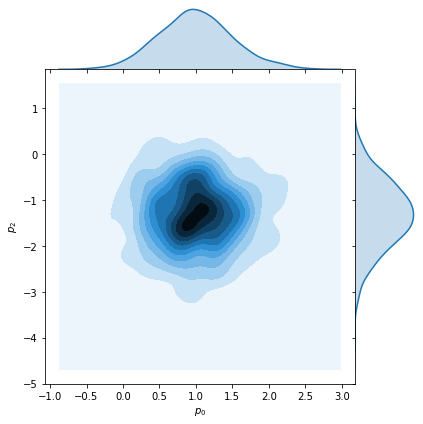

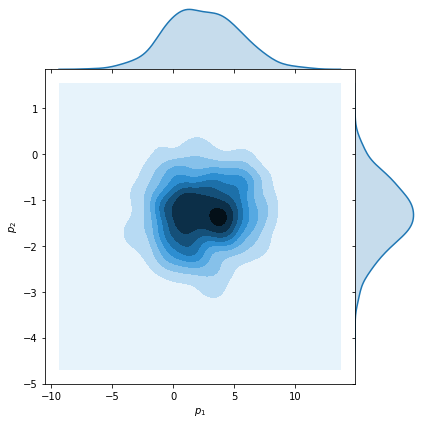

In [3]:
fjd, used_settings = mcp.plot_joint_distributions(
    chains=chain,
    settings=None,
    return_settings=True)

# Change the Type of Joint Plot, Figure Size, and Color
We can easily adjust the type of joint plot, size of the figure, and color map defining the following settings.

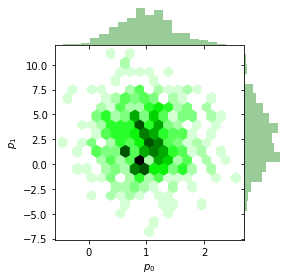

In [4]:
settings = dict(
        kind='hex',
        height=4,
        color='g')
fjd = mcp.plot_joint_distributions(
    chains=chain[:,0:2],
    settings=settings)

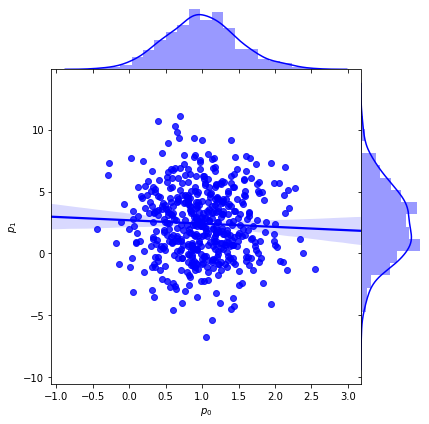

In [5]:
settings = dict(
        kind='reg',
        height=6,
        color='b')
fjd = mcp.plot_joint_distributions(
    chains=chain[:,0:2],
    settings=settings)

# Edit the seaborn Style
The default seaborn style is `white`, but it can be changed by defining the `sns_style` variable.  Each style has it's own settings, so see the [seaborn style documentation](https://seaborn.pydata.org/tutorial/aesthetics.html) for details.

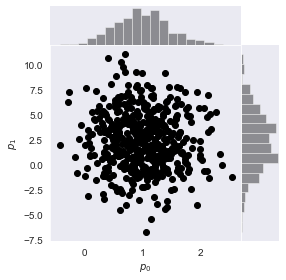

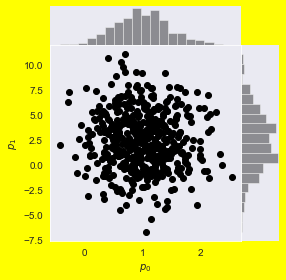

In [6]:
import seaborn as sns

settings = dict(
        kind='scatter',
        height=4,
        color='k')
sns.set_style('dark')
fjd = mcp.plot_joint_distributions(
    chains=chain[:,0:2],
    settings=settings)

# use context manager so style change only affects this figure
with sns.axes_style({'figure.facecolor': 'yellow'}):
    fjd = mcp.plot_joint_distributions(
        chains=chain[:,0:2],
        settings=settings)

# Manually Edit Features
As seaborn is built on top of matplotlib, you can edit various plot features in the same way.  The output from the `plot_joint_distributions` method will contain the figure handles inside a `list` unless only one figure was generated.  In that case, the handle is outputted directly.

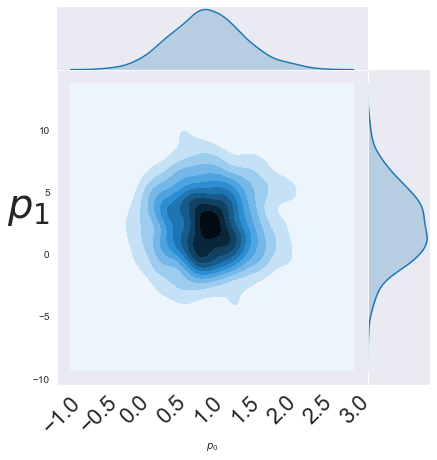

In [7]:
fjd = mcp.plot_joint_distributions(
    chains=chain[:,0:2],
    settings=None)
a = fjd.ax_joint
# adjust x-tick labels
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(22)
    tick.label.set_rotation(45)
# adjust y-axis label
tmp = a.yaxis.get_label()
tmp.set_fontsize(40)
tmp.set_rotation('horizontal')